In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
inventory_price = pd.read_csv("Data_OTT/inventory_2.csv")

In [3]:
inventory_price.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1


In [4]:
inventory_price  = inventory_price.drop("Unnamed: 0", axis=1)

In [5]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

In [6]:
inventory_price.isnull().sum()

item_id               0
contract_year         0
movie_id              0
title                 0
price                 0
release_year          0
release_date          0
runtime               0
mpa_rating            0
mpa_rating_origin     0
imdb_score            0
votes                 0
reviews_users         0
reviews_critics       0
budget                0
income_usa            0
income_ww             0
theater_opening       0
theater_total         0
country_1             0
country_2            67
country_3            92
studio                0
director              0
Genre_1               0
Genre_2               3
Genre_3              10
actor_1               0
actor_2               0
actor_3               0
contract_price        0
studio_score          0
price_class           0
dtype: int64

In [7]:
inventory_price = inventory_price.drop(["country_2", "country_3"], axis = 1)

In [8]:
inventory_price = inventory_price.fillna("ETC")

In [9]:
inventory_price = inventory_price.drop(["mpa_rating_origin", "release_date", "theater_opening", "theater_total"], axis = 1)

In [12]:
ls = list(inventory_price.columns)

In [14]:
"', '".join(ls)

"item_id', 'contract_year', 'movie_id', 'title', 'price', 'release_year', 'runtime', 'mpa_rating', 'imdb_score', 'votes', 'reviews_users', 'reviews_critics', 'budget', 'income_usa', 'income_ww', 'country_1', 'studio', 'director', 'Genre_1', 'Genre_2', 'Genre_3', 'actor_1', 'actor_2', 'actor_3', 'contract_price', 'studio_score', 'price_class"

In [15]:
inv_price = inventory_price[['item_id', 'movie_id', 'title', 'release_year', 'contract_year', 
                             'runtime', 'mpa_rating', 'imdb_score', 'votes', 'reviews_users', 'reviews_critics', 
                             'budget', 'income_usa', 'income_ww', 'country_1', 'studio', 'director', 
                             'Genre_1', 'Genre_2', 'Genre_3', 'actor_1', 'actor_2', 'actor_3', 
                            'contract_price', 'studio_score', 'price_class', 'price']]     

In [18]:
inv_price.shape

(106, 27)

In [130]:
inv_price.head()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,I-1001,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,2015,140,PG-13,7.5,655343,3385,...,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,5500.0
1,I-1002,tt0330373,Harry Potter and the Goblet of Fire,2005,2015,157,PG-13,7.7,501735,1933,...,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,4500.0
2,I-1003,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,2015,143,PG,6.9,346171,1490,...,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,5500.0
3,I-1004,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,2015,151,PG-13,7.3,623360,1867,...,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,5500.0
4,I-1005,tt0413300,Spider-Man 3,2007,2015,139,PG-13,6.2,471773,2011,...,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,4000.0


### inventory + price (칼럼 삭제 完)

In [19]:
inv_price.to_csv("inventory_price.csv")

- 상영 극장수 수정

## 고객 데이터 불러오기

In [20]:
customers = pd.read_csv("Data_OTT/movie_customer.csv", encoding="cp949")

In [21]:
customers.shape

(3277, 8)

In [22]:
download = pd.read_csv("Data_OTT/movie_down.csv")

In [23]:
download

,customer_id,item_id,down_date,down_year,down_month,down_weekday
0,C5001,I-1038,2015-01-08,2015,2015M01,Thu
1,C5001,I-1003,2015-01-17,2015,2015M01,Sat
2,C5001,I-1017,2015-01-17,2015,2015M01,Sat
3,C5001,I-1028,2015-01-19,2015,2015M01,Mon
4,C5001,I-1036,2015-01-20,2015,2015M01,Tue
...,...,...,...,...,...,...
116459,C8277,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,I-1091,2018-10-25,2018,2018M10,Thu


In [24]:
cust_down = pd.merge(customers, download, on='customer_id')

In [25]:
cust_down.tail(10)

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,item_id,down_date,down_year,down_month,down_weekday
116454,C8277,M,37,30대,S,N,강남구,2018,I-1070,2018-01-26,2018,2018M01,Fri
116455,C8277,M,37,30대,S,N,강남구,2018,I-1093,2018-05-08,2018,2018M05,Tue
116456,C8277,M,37,30대,S,N,강남구,2018,I-1052,2018-05-27,2018,2018M05,Sun
116457,C8277,M,37,30대,S,N,강남구,2018,I-1017,2018-06-15,2018,2018M06,Fri
116458,C8277,M,37,30대,S,N,강남구,2018,I-1086,2018-08-17,2018,2018M08,Fri
116459,C8277,M,37,30대,S,N,강남구,2018,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,M,37,30대,S,N,강남구,2018,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,M,37,30대,S,N,강남구,2018,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,M,37,30대,S,N,강남구,2018,I-1091,2018-10-25,2018,2018M10,Thu
116463,C8277,M,37,30대,S,N,강남구,2018,I-1016,2018-11-15,2018,2018M11,Thu


### 사용자 다운로드 횟수

In [26]:
count = pd.DataFrame(cust_down["customer_id"].value_counts())
count.rename(columns={"customer_id":"download_count"}, inplace = True)
count = count.rename_axis('customer_id').reset_index()

In [27]:
count.head()

,customer_id,download_count
0,C5966,101
1,C5916,99
2,C5694,99
3,C5039,98
4,C5630,98


In [28]:
customer_count = pd.merge(customers, count)

In [31]:
customer_count.shape

(3277, 9)

### 사용자 총 구매금액

### 고객 구매 데이터 활용
    - 총 가격 구하기
    - 총 가격에 따른 등급 나누기 

In [34]:
inv_price.head()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,I-1001,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,2015,140,PG-13,7.5,655343,3385,...,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,5500.0
1,I-1002,tt0330373,Harry Potter and the Goblet of Fire,2005,2015,157,PG-13,7.7,501735,1933,...,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,4500.0
2,I-1003,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,2015,143,PG,6.9,346171,1490,...,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,5500.0
3,I-1004,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,2015,151,PG-13,7.3,623360,1867,...,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,5500.0
4,I-1005,tt0413300,Spider-Man 3,2007,2015,139,PG-13,6.2,471773,2011,...,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,4000.0


In [35]:
movie_data = pd.merge(inv_price, cust_down, on = "item_id")

In [36]:
# 인벤토리, 유저, 다운로드 다 섞임
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116464 entries, 0 to 116463
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          116464 non-null  object 
 1   movie_id         116464 non-null  object 
 2   title            116464 non-null  object 
 3   release_year     116464 non-null  int64  
 4   contract_year    116464 non-null  int64  
 5   runtime          116464 non-null  int64  
 6   mpa_rating       116464 non-null  object 
 7   imdb_score       116464 non-null  float64
 8   votes            116464 non-null  int64  
 9   reviews_users    116464 non-null  int64  
 10  reviews_critics  116464 non-null  int64  
 11  budget           116464 non-null  int64  
 12  income_usa       116464 non-null  int64  
 13  income_ww        116464 non-null  int64  
 14  country_1        116464 non-null  object 
 15  studio           116464 non-null  object 
 16  director         116464 non-null  obje

In [37]:
p_count = movie_data.groupby(["customer_id"])["price"].sum()
price = pd.DataFrame(p_count)

In [38]:
customer_total = pd.merge(customer_count, price, on = "customer_id")
customer_total.rename(columns={"price":"total_price"}, inplace = True)

In [39]:
customer_total.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0


In [40]:
total_price = customer_total["total_price"]

(array([401., 585., 576., 584., 357., 340., 198., 116.,  93.,  27.]),
 array([ 14700.,  58430., 102160., 145890., 189620., 233350., 277080.,
        320810., 364540., 408270., 452000.]),
 <BarContainer object of 10 artists>)

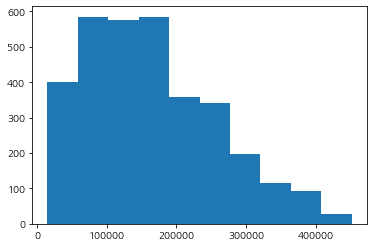

In [42]:
plt.hist(customer_total["total_price"])

- 14700 ~ 452000원까지 분포가 되어 있음

In [237]:
total_price.describe()

count      3277.000000
mean     165020.262435
std       93055.880442
min       14700.000000
25%       89500.000000
50%      150300.000000
75%      228000.000000
max      452000.000000
Name: total_price, dtype: float64

- 등급 만들기

In [43]:
conditionlist = [
    (customer_total['total_price'] <= 90000) ,
    (customer_total['total_price'] <= 150000) ,
    (customer_total['total_price'] <= 230000),
    (customer_total['total_price'] >= 230000)]
choicelist = ['Bronze', 'Silver', 'Gold', 'Platinum']
customer_total['class'] = np.select(conditionlist, choicelist, default='Not Specified')

In [44]:
customer_total.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold


### 고객 + 다운로드 횟수, 누적 금액, 등급

In [164]:
customer_total.to_csv("movie_custom_final.csv", index=False)

###  영화 데이터 수입 데이터
- 수입이 있는 영화는 94개이다.
- 수입이 없는 영화는 12개이다.

In [67]:
mp_count = movie_data.groupby(["movie_id"])["price"].sum()
price = pd.DataFrame(mp_count)

In [68]:
price.rename(columns={"price":"total_price"}, inplace = True)
price = price.reset_index()

In [69]:
price.head()

,movie_id,total_price
0,tt0121766,3487000.0
1,tt0330373,4032000.0
2,tt0363771,3536500.0
3,tt0367882,7210000.0
4,tt0369610,6237000.0


In [70]:
price.shape

(94, 2)

In [108]:
inv_price.shape

(106, 27)

In [109]:
inv_pri_title = pd.merge(inv_price, price, on = "movie_id", how = "left")

In [111]:
inv_pri_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item_id          106 non-null    object 
 1   movie_id         106 non-null    object 
 2   title            106 non-null    object 
 3   release_year     106 non-null    int64  
 4   contract_year    106 non-null    int64  
 5   runtime          106 non-null    int64  
 6   mpa_rating       106 non-null    object 
 7   imdb_score       106 non-null    float64
 8   votes            106 non-null    int64  
 9   reviews_users    106 non-null    int64  
 10  reviews_critics  106 non-null    int64  
 11  budget           106 non-null    int64  
 12  income_usa       106 non-null    int64  
 13  income_ww        106 non-null    int64  
 14  country_1        106 non-null    object 
 15  studio           106 non-null    object 
 16  director         106 non-null    object 
 17  Genre_1         

In [112]:
inv_pri_title.isnull().sum()

item_id             0
movie_id            0
title               0
release_year        0
contract_year       0
runtime             0
mpa_rating          0
imdb_score          0
votes               0
reviews_users       0
reviews_critics     0
budget              0
income_usa          0
income_ww           0
country_1           0
studio              0
director            0
Genre_1             0
Genre_2             0
Genre_3             0
actor_1             0
actor_2             0
actor_3             0
contract_price      0
studio_score        0
price_class         0
price               0
total_price        12
dtype: int64

In [113]:
inv_pri_title.fillna(0,inplace=True)

In [114]:
inv_pri_title.columns

Index(['item_id', 'movie_id', 'title', 'release_year', 'contract_year',
       'runtime', 'mpa_rating', 'imdb_score', 'votes', 'reviews_users',
       'reviews_critics', 'budget', 'income_usa', 'income_ww', 'country_1',
       'studio', 'director', 'Genre_1', 'Genre_2', 'Genre_3', 'actor_1',
       'actor_2', 'actor_3', 'contract_price', 'studio_score', 'price_class',
       'price', 'total_price'],
      dtype='object')

(array([24., 15., 16., 27., 13.,  4.,  1.,  1.,  3.,  2.]),
 array([       0.,  1799500.,  3599000.,  5398500.,  7198000.,  8997500.,
        10797000., 12596500., 14396000., 16195500., 17995000.]),
 <BarContainer object of 10 artists>)

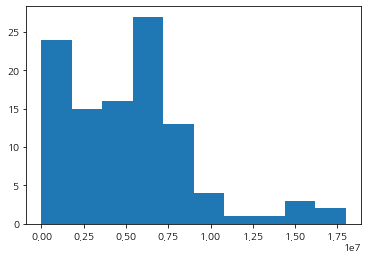

In [115]:
plt.hist(inv_pri_title["total_price"])

- 데이터 변경(원화 - 달러)

In [116]:
inv_pri_title["total_dollar"] = (inv_pri_title["total_price"] / 1136).round()

In [117]:
inv_pri_title

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar
0,I-1001,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,2015,140,PG-13,7.5,655343,3385,...,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,5500.0,3487000.0,3070.0
1,I-1002,tt0330373,Harry Potter and the Goblet of Fire,2005,2015,157,PG-13,7.7,501735,1933,...,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,4500.0,4032000.0,3549.0
2,I-1003,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,2015,143,PG,6.9,346171,1490,...,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,5500.0,3536500.0,3113.0
3,I-1004,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,2015,151,PG-13,7.3,623360,1867,...,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,5500.0,1474000.0,1298.0
4,I-1005,tt0413300,Spider-Man 3,2007,2015,139,PG-13,6.2,471773,2011,...,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,4000.0,2564000.0,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,I-1102,tt5095030,Ant-Man and the Wasp,2018,2019,118,PG-13,7.1,266808,906,...,Comedy,Paul Rudd,Evangeline Lilly,Michael Pe��a,2295,10,1,7200.0,0.0,0.0
102,I-1103,tt4912910,Mission: Impossible - Fallout,2018,2019,147,PG-13,7.8,251993,1553,...,Thriller,Tom Cruise,Henry Cavill,Ving Rhames,2700,10,10,5000.0,0.0,0.0
103,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,3239,...,Music,Rami Malek,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0
104,I-1105,tt5848272,Ralph Breaks the Internet,2018,2019,112,PG,7.1,105555,723,...,Comedy,John C. Reilly,Sarah Silverman,Gal Gadot,2295,10,1,7200.0,0.0,0.0


In [118]:
inv_pri_title["interest"] = inv_pri_title["total_dollar"] -  inv_pri_title["contract_price"]

In [119]:
inv_pri_title.sort_values(by = "interest", ascending=False, inplace=True)

In [121]:
inv_pri_title.head()

,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,reviews_users,...,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest
62,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,188,...,Trombone Shorty,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0
60,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,1231,...,Matt Damon,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0
58,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,376,...,O'Shea Jackson Jr.,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0
61,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,1101,...,Daniel Craig,Christoph Waltz,L��a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0
59,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,148,...,Adam Sandler,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0


### 인벤토리 가격, 수익 

In [165]:
inv_pri_title.to_csv("inventory_interest_final.csv", index=False)

## 다운로드 데이터 변경

In [152]:
download_season = pd.read_csv("Data_OTT/download_month.csv")

In [153]:
download_season.head()

,Unnamed: 0,customer_id,item_id,down_date,down_year,down_month,down_weekday,season
0,0,C5001,I-1038,2015-01-08,2015,Jan,Thu,winter
1,1,C5001,I-1003,2015-01-17,2015,Jan,Sat,winter
2,2,C5001,I-1017,2015-01-17,2015,Jan,Sat,winter
3,3,C5001,I-1028,2015-01-19,2015,Jan,Mon,winter
4,4,C5001,I-1036,2015-01-20,2015,Jan,Tue,winter


In [154]:
download_season.drop(["Unnamed: 0", "down_date"], axis=1, inplace=True)

In [155]:
download_inventory = pd.merge(download_season, inv_price, on = "item_id")

In [156]:
download_inventory.head()

,customer_id,item_id,down_year,down_month,down_weekday,season,movie_id,title,release_year,contract_year,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,C5001,I-1038,2015,Jan,Thu,winter,tt1951264,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
1,C5011,I-1038,2015,Mar,Fri,spring,tt1951264,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
2,C5024,I-1038,2015,Aug,Wed,summer,tt1951264,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
3,C5027,I-1038,2015,May,Mon,spring,tt1951264,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
4,C5035,I-1038,2015,Aug,Wed,summer,tt1951264,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0


In [157]:
col = "', '".join(list(download_inventory.columns))

In [158]:
download_inventory = download_inventory[['customer_id', 'item_id', 'movie_id', 'down_year', 'down_month', 'down_weekday', 
                                        'season', 'title', 'release_year', 'contract_year', 'runtime',
                                        'mpa_rating', 'imdb_score', 'votes', 'reviews_users', 'reviews_critics', 
                                        'budget', 'income_usa', 'income_ww', 'country_1', 'studio', 'director', 
                                        'Genre_1', 'Genre_2', 'Genre_3', 'actor_1', 'actor_2', 'actor_3', 
                                        'contract_price', 'studio_score', 'price_class', 'price']]

## 다운로드 + 인벤토리 영화정보

In [163]:
download_inventory.to_csv("download_inventory_final.csv", index=False)

## 영화 메타 데이터 budget

In [177]:
movie_meta_budget = pd.read_csv("Data_OTT/meta_budget0.csv")

In [179]:
movie_meta_budget = movie_meta_budget.drop(['title', 'studio', 'Unnamed: 0'], axis = 1)

In [186]:
movie_meta_budget.head()

,movie_id,budget
0,tt0472033,30000000
1,tt0478087,35000000
2,tt0453562,40000000
3,tt0416449,65000000
4,tt0450385,25000000


In [173]:
movie_meta = pd.read_csv("Data_OTT/movie_meta.csv", encoding="cp949")

In [180]:
movie_meta.shape

(1668, 40)

In [183]:
movie_meta.drop("budget", axis=1, inplace=True)

In [188]:
movie_meta_final = pd.merge(movie_meta, movie_meta_budget, on = "movie_id")

In [192]:
movie_meta_final.to_csv("movie_meta_final.csv", index=False)

In [193]:
movie_meta_final

,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,votes,reviews_users,...,studio_score,price_class,writer_1,writer_2,actor_1,actor_2,actor_3,description,storyline,budget
0,tt0472033,9,2009,09-09-2009,79,PG-13,PG-13,7.1,127563,267,...,6,1,Pamela Pettler,Shane Acker,Christopher Plummer,Martin Landau,John C. Reilly,A rag doll that awakens in a postapocalyptic f...,In a world destroyed in a war between man and ...,30000000
1,tt0478087,21,2008,03-28-2008,123,PG-13,PG-13,6.8,216963,302,...,10,1,Peter Steinfeld,Allan Loeb,Jim Sturgess,Kevin Spacey,Kate Bosworth,"""21"" is the fact-based story about six MIT stu...","Ben Campbell is a young, highly intelligent, s...",35000000
2,tt0453562,42,2013,04-12-2013,128,PG-13,PG-13,7.5,79204,234,...,10,10,Brian Helgeland,NaN,Chadwick Boseman,Harrison Ford,Nicole Beharie,"In 1947, Jackie Robinson becomes the first Afr...","In 1946, Jackie Robinson is a Negro League bas...",40000000
3,tt0416449,300,2006,03-09-2007,117,R,R,7.7,702777,2142,...,10,10,Zack Snyder,Kurt Johnstad,Gerard Butler,Lena Headey,Dominic West,King Leonidas of Sparta and a force of 300 men...,In the Battle of Thermopylae of 480 BC an alli...,65000000
4,tt0450385,1408,2007,06-22-2007,104,PG-13,PG-13,6.8,245370,622,...,4,1,Matt Greenberg,Scott Alexander,John Cusack,Tony Shalhoub,Len Cariou,A man who specialises in debunking paranormal ...,The cynical and skeptical writer Mike Enslin w...,25000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,tt0443706,Zodiac,2007,03-02-2007,157,R,R,7.7,407046,698,...,10,1,James Vanderbilt,Robert Graysmith,Jake Gyllenhaal,Mark Ruffalo,Anthony Edwards,"In the late 1960s/early 1970s, a San Francisco...",A serial killer in the San Francisco Bay Area ...,65000000
1666,tt1156398,Zombieland,2009,10-02-2009,88,R,R,7.6,482780,680,...,6,10,Rhett Reese,Paul Wernick,Jesse Eisenberg,Woody Harrelson,Emma Stone,A shy student trying to reach his family in Oh...,Searching for family. In the early twenty-firs...,23600000
1667,tt1222817,Zookeeper,2011,07-08-2011,102,PG,PG,5.2,53731,132,...,10,1,Nick Bakay,Rock Reuben,Kevin James,Rosario Dawson,Leslie Bibb,A group of zoo animals decide to break their c...,A group of zoo animals decide to break their c...,80000000
1668,tt1608290,Zoolander 2,2016,02-12-2016,101,PG-13,PG-13,4.7,61163,213,...,10,1,Justin Theroux,Ben Stiller,Justin Bieber,Jon Daly,Pen lope Cruz,Derek and Hansel are lured into modelling agai...,After many years of being separated from model...,50000000
